In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# There are three sheets in the xlsx file --> Specify excess returns
file_path = 'multi_asset_etf_data-2.xlsx'
excess_returns = pd.read_excel(file_path, sheet_name="excess returns", index_col=0, engine = "openpyxl")

In [2]:
# Display the first few rows of the dataframe
excess_returns.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008440,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295598,0.229649,0.022329,0.098793,-0.018505
2009-05-31,0.054143,0.163134,0.159871,0.132390,0.029026,-0.020302,0.023198,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004550,-0.026858,-0.023093,-0.014648,0.032919,-0.006170,-0.025461,0.044850,-0.004035,-0.001253,0.001383
2009-07-31,0.031311,0.018594,0.110173,0.100441,0.069217,0.008344,0.105826,0.143275,0.015352,0.074632,0.000905
2009-08-31,0.007192,-0.040800,-0.013571,0.044595,-0.017405,0.007199,0.131503,0.032977,-0.004586,0.036504,0.007978


In [3]:
# Annualization factors
annual_factor_mean = 12
annual_factor_volatility = np.sqrt(12)
annual_factor_sharpe = np.sqrt(12)

In [10]:
# 1. Summary Statistics
# (a) Calculate and display the mean and volatility of each asset’s excess return

# Initialize dictionary
stats = {}
# mean() and std() return series. These are placed into the stats dictionary
stats["Mean"] = excess_returns.mean() * annual_factor_mean
stats["Vol"] = excess_returns.std() * annual_factor_volatility
# Dividing excess returns by volatility to find the sharpe ratio
stats["Sharpe Ratio"] = stats["Mean"] / stats["Vol"]
# Converting to a dataframe.
stats = pd.DataFrame(stats)
# Sorting in asecending order (bottom to top) by sharpe ratio
stats.sort_values("Sharpe Ratio", ascending=False)

,Mean,Vol,Sharpe Ratio
SPY,0.145133,0.147890,0.981357
HYG,0.062909,0.088292,0.712512
IYR,0.122743,0.189811,0.646659
PSP,0.134369,0.226988,0.591964
EFA,0.083817,0.164818,0.508542
TIP,0.020233,0.051752,0.390955
QAI,0.019373,0.050940,0.380306
EEM,0.064970,0.194206,0.334541
IEF,0.011250,0.064291,0.174981
DBC,0.021884,0.175468,0.124717


b) SPY has the greatest sharpe ratio. BWX has the worst sharpe ratio.

<AxesSubplot:>

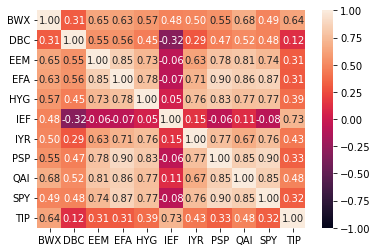

In [11]:
# 2. Descriptive Analysis
#(a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

correlations = excess_returns.corr()
# Heatmap function from seaborn. vmin and vmax determine the max and min values for the heatmap. fmt determines the decimal places.
sns.heatmap(correlations, vmin = -1, vmax = 1, annot = True, fmt = "0.2f")

We can see that SPY and PSP have had the higest correlation at 0.90 while IEF and DBC have had the lowest at -0.32.

In [12]:
# b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

# Domestic -> IEF
# Foreign -> BWX

stats.loc[["IEF", "BWX", "TIP"]]

,Mean,Vol,Sharpe Ratio
IEF,0.011250,0.064291,0.174981
BWX,-0.004532,0.085384,-0.053080
TIP,0.020233,0.051752,0.390955


We can see that TIP has a higher excess returns rate and a lower volatility, which leads to a much higher sharpe ratio. By these metrics, it outperforms the other two.

c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

It seems as if TIPS does not really expand the investment opportunity set. This implies that Harvard should not consider them as a separate asset.

In [13]:
# 3. The MV frontier.
# a) Compute and display the weights of the tangency portfolios

# @ is the matrix multiplication sybol

def tangency_portf(mean_returns, cov_matrix):
    inverted_cov = np.linalg.inv(cov_matrix)
    one_vector = np.ones(mean_returns.shape)
    return (inverted_cov @ mean_returns) / (one_vector @ inverted_cov @ mean_returns)


w_tan = tangency_portf(excess_returns.mean(), excess_returns.cov())

w_tan_df = pd.DataFrame(w_tan, index=excess_returns.columns, columns=["Tangency Portfolio"])

w_tan_df


,Tangency Portfolio
BWX,-46.264168
DBC,1.701262
EEM,10.018155
EFA,0.512125
HYG,34.746935
IEF,62.959134
IYR,-12.366143
PSP,-11.528256
QAI,-114.131006
SPY,69.900939


In [14]:
# b)
w_tan_rets = pd.DataFrame(excess_returns @ w_tan_df)

tan_stats = {}
tan_stats["Mean"] = w_tan_rets.mean()
tan_stats["Vol"] = w_tan_rets.std()
tan_stats["Sharpe Ratio"] = tan_stats["Mean"] / tan_stats["Vol"]    
# Converting to a dataframe.
tan_stats = pd.DataFrame(tan_stats)
tan_stats

,Mean,Vol,Sharpe Ratio
Tangency Portfolio,0.734346,1.52807,0.480571


In [15]:
# 4. The allocation.
# a) Compute and display the weights of MV portfolios with target returns of μp = .0075.4

allocation = tangency_portf(excess_returns.mean(), excess_returns.cov())

allocation = allocation * (0.0075 / (excess_returns.mean() @ allocation))
allocation

array([-0.47250351,  0.01737527,  0.10231706,  0.00523041,  0.35487613,
        0.64301193, -0.12629744, -0.11773996, -1.16563863,  0.71390971,
        0.05567219])

In [16]:
# b) What is the mean, volatility, and Sharpe ratio for wp?
allocation_rets = pd.DataFrame(excess_returns @ allocation)
allocation_stats = {}
allocation_stats["Mean"] = allocation_rets.mean()
allocation_stats["Vol"] = allocation_rets.std()
allocation_stats["Sharpe Ratio"] = allocation_stats["Mean"] / allocation_stats["Vol"]

allocation_stats = pd.DataFrame(allocation_stats)
allocation_stats

,Mean,Vol,Sharpe Ratio
0,0.0075,0.015606,0.480571


In [17]:
pd.DataFrame(allocation)

,0
0,-0.472504
1,0.017375
2,0.102317
3,0.005230
4,0.354876
5,0.643012
6,-0.126297
7,-0.117740
8,-1.165639
9,0.713910


c) Discuss the allocation. In which assets is the portfolio most long? And short?

BWX appears to be the most short. SPY appears to be the longest.

d) Does this line up with which assets have the strongest Sharpe ratios?

Yes. BWX has the smallest Sharpe Ratio, and SPY has the largest Sharpe Ratio.

In [18]:
# 5. Simple Portfolios
# a) Calculate the performance of the equally-weighted portfolio over the sample. 
# Rescale the entire weighting vector to have target mean μp = .0075. 
# Report its mean, volatility, and Sharpe ratio.


equal_weighted = np.ones(len(excess_returns.columns)) / len(excess_returns.columns)
equal_weighted = equal_weighted * (0.0075 / (excess_returns.mean() @ equal_weighted))


# Calculate the returns of the equal weighted portfolio.
eq_rets = pd.DataFrame(excess_returns @ equal_weighted)
eq_stats = {}
eq_stats["Mean"] = eq_rets.mean()
eq_stats["Vol"] = eq_rets.std()
eq_stats["Sharpe Ratio"] = eq_stats["Mean"] / eq_stats["Vol"]

eq_stats = pd.DataFrame(eq_stats)
eq_stats

,Mean,Vol,Sharpe Ratio
0,0.0075,0.04361,0.171979


In [19]:
# b) Calculate the performance of the “risk-parity” portfolio over the sample. Risk-parity is a
# term used in a variety of ways, but here we have in mind setting the weight of the portfolio
# to be proportional to the inverse of its full-sample volatility estimate

risk_parity = 1/excess_returns.std()

risk_parity = risk_parity * (0.0075 / (excess_returns.mean() @ risk_parity))

# Calculate the returns of the equal weighted portfolio.
risk_parity_rets = pd.DataFrame(excess_returns @ risk_parity)
rp_stats = {}
rp_stats["Mean"] = risk_parity_rets.mean()
rp_stats["Vol"] = risk_parity_rets.std()
rp_stats["Sharpe Ratio"] = rp_stats["Mean"] / rp_stats["Vol"]

rp_stats = pd.DataFrame(rp_stats)
rp_stats

,Mean,Vol,Sharpe Ratio
0,0.0075,0.044732,0.167665


c) How does these compare to the MV portfolio from problem 2.4?

The volatility is slightly higher, and the sharpe ratio is slightly lower.

In [20]:
# 6. Assess how much the Sharpe Ratio goes down if we drop TIPS from the investment set, (and
# just have a 10-asset problem.) See how much it decreases the performance statistics in 2.4. And
# how much worse is the performance in 3.3?

no_TIP = excess_returns.drop('TIP', axis=1)
no_TIP_portf = tangency_portf(no_TIP.mean(), no_TIP.cov())

no_TIP_portf = no_TIP_portf * (0.0075 / (no_TIP.mean() @ no_TIP_portf))
no_TIP_returns = pd.DataFrame(no_TIP @ no_TIP_portf)
no_TIP_stats = {}
no_TIP_stats["Mean"] = no_TIP_returns.mean()
no_TIP_stats["Vol"] = no_TIP_returns.std()
no_TIP_stats["Sharpe Ratio"] = no_TIP_stats["Mean"] / no_TIP_stats["Vol"]

no_TIP_stats = pd.DataFrame(no_TIP_stats)
no_TIP_stats

,Mean,Vol,Sharpe Ratio
0,0.0075,0.015612,0.480388


The change in performance from the portfolio in 2.4 seems to be very small, likely because the allocation for TIPS was relatively small in the first place.